In [1]:
import os
import yaml


from roadvision3d.src.engine.dataloader import build_dataloader
from roadvision3d.src.engine.model_builder import build_model
from roadvision3d.src.engine.tester import Tester
from roadvision3d.src.datasets.kitti import KITTI
from inference import prepare_data
from roadvision3d.src.engine.decode_helper import extract_dets_from_outputs
from roadvision3d.src.engine.decode_helper import decode_detections
from roadvision3d.src.engine.model_saver import load_checkpoint
from roadvision3d.src.engine.logger import Logger
from roadvision3d.src.datasets.object_3d import Object3d

from inference import inference_on_dataset
from visualizer import draw_2d_bboxes, draw_3d_bboxes


import torch
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/kitti_v2.yaml'
cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)    
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

data_id = 27
split = 'test'


In [4]:
results = inference_on_dataset(data_id, split, cfg, device)
print(results)

[Car 0.000 0.000 1.955 box2d: [261.32626 188.14497 475.62772 345.6783 ] hwl: [1.545 1.598 3.648] pos: [-2.978504  1.818145  9.592751] ry: 1.633, Car 0.000 0.000 -1.785 box2d: [699.11237 171.22725 808.7753  255.40999] hwl: [1.639 1.694 4.009] pos: [ 3.035087  1.631433 16.271132] ry: -1.587, Car 0.000 0.000 1.796 box2d: [495.62842 188.28542 559.4164  234.09337] hwl: [1.491 1.638 3.842] pos: [-2.972382  2.094653 26.317854] ry: 1.683, Car 0.000 0.000 -1.408 box2d: [537.5662  180.0739  589.3022  223.30585] hwl: [1.611 1.633 4.380] pos: [-1.934584  1.982441 30.006872] ry: -1.471, Car 0.000 0.000 1.645 box2d: [583.5744  177.7121  615.23956 207.28769] hwl: [1.716 1.667 4.161] pos: [-0.667652  2.008065 42.930588] ry: 1.631, Car 0.000 0.000 -1.730 box2d: [665.7807  166.73456 704.9085  197.78894] hwl: [1.785 1.722 4.397] pos: [ 4.634912  1.446343 45.17622 ] ry: -1.625]


In [5]:
data = KITTI(split=split, cfg=cfg['dataset'])
img = data.get_image(data_id)
calib = data.get_calib(data_id)

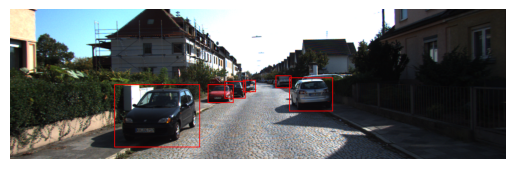

In [6]:
img_2d = img.copy()
draw_2d_bboxes(img_2d, results)

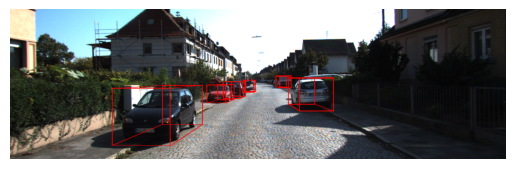

In [7]:
img_3d = img.copy()
draw_3d_bboxes(img_3d, results, calib)